In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
plt.rcParams["figure.figsize"] = (10,6)
from matplotlib import style
plt.style.use('ggplot')

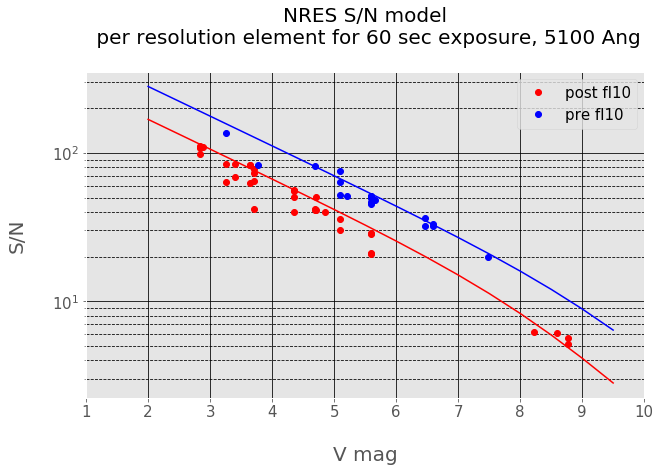

In [2]:

def readdata (fname):
    
    data = np.genfromtxt (fname, unpack=True, dtype=None, 
                          skip_footer=0, names=['star','vmag','sn','texp'])
    sn60 = data['sn'] * np.sqrt (60. / data['texp'])
    return data['vmag'], sn60


def snmodel (s0=180000, ron=5):
    x = np.arange (2,10,0.5)
    s = 10 ** (-0.4 * x) * s0
    sn = s / np.sqrt (s + 3 * ron ** 2)
    return x, sn



fig, ax = plt.subplots(1)
ron=5

(v,sn) = readdata ('nressn_postfl10.txt')
plt.semilogy (v,sn,'o', color='red', label='post fl10')
(x,sn) = snmodel (180000,ron)
plt.semilogy (x,sn, color='red')

(v,sn) = readdata ('nressn_prefl10.txt')
plt.semilogy (v,sn,'o', color='blue', label='pre fl10')
(x,sn) = snmodel (500000,ron)
plt.semilogy (x,sn, color='blue')

plt.legend(  fontsize=15)
plt.xlim([1,10])
plt.xlabel ( "\nV mag",  fontsize=20)
plt.ylabel ("S/N\n",  fontsize=20)
plt.title ("NRES S/N model\n per resolution element for 60 sec exposure, 5100 Ang\n",  fontsize=20)
ax.grid(b=True, which='major', color='k', linestyle='-')
ax.grid(b=True, which='minor', color='k', linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=10)

plt.savefig("nressn_Sept2017.png");  